In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import os
import csv
import datetime
from glob import glob


#read files           
df_eda =pd.read_csv("C:/Users/anilp/Project_Files/1697435524_A044DF/EDA.csv", skiprows=1)
df_bvp =pd.read_csv("C:/Users/anilp/Project_Files/1697435524_A044DF/BVP.csv", skiprows=1)
   
eda_value = df_eda.rename(columns = {'4.000000' : 'EDA'})
bvp_value = df_bvp.rename(columns = {'64.000000' : 'BVP'})

[    3     5     8 ... 44105 44107 44110]


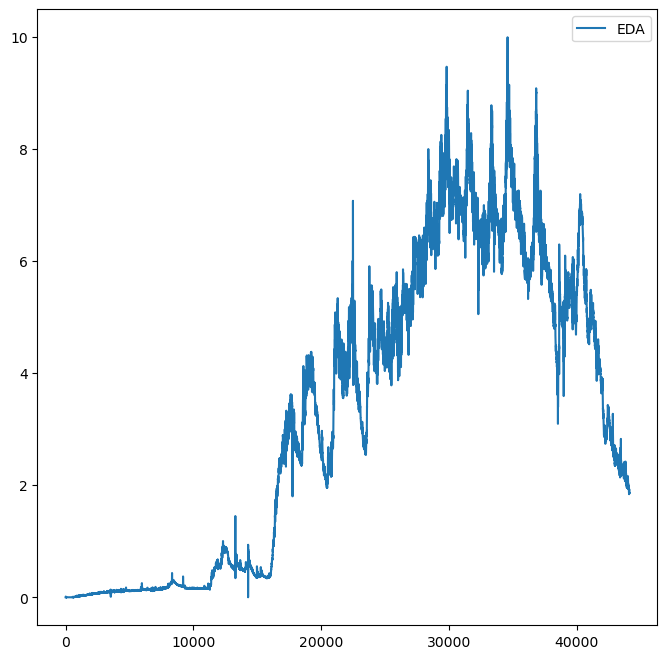

In [40]:
#first eda plot and print peaks

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.legend()

peaks_eda, _ = find_peaks(eda_value['EDA'])
print(peaks_eda)

0          -0.00
1          -0.00
2          -0.00
3          -0.00
4          -0.00
           ...  
705832   -322.03
705833   -343.35
705834   -361.17
705835   -374.98
705836   -385.06
Name: BVP, Length: 705837, dtype: float64
[    11     78    120 ... 705761 705785 705806]


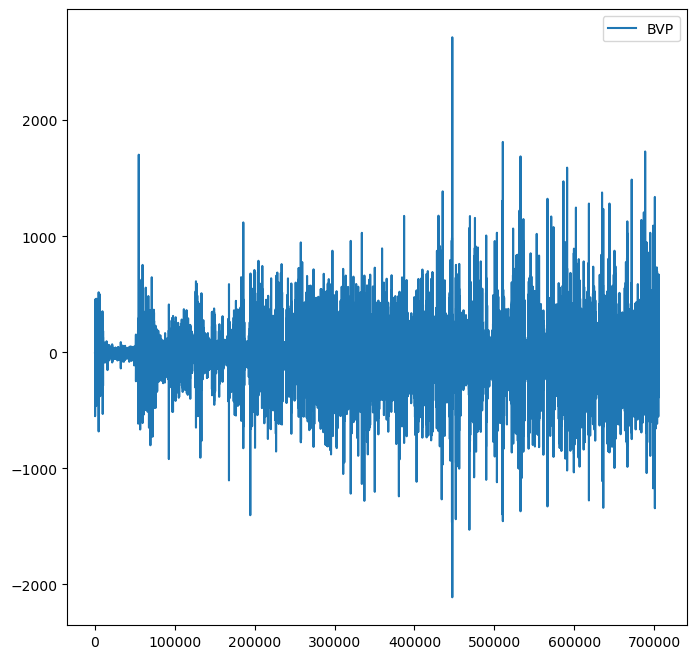

In [48]:
#first bvp plot and print peaks

plt.figure(figsize=(8, 8))
plt.plot(bvp_value, label='BVP')
plt.legend()

peaks_bvp, _ = find_peaks(bvp_value['BVP'])

print(bvp_value['BVP'])
print(peaks_bvp)

<class 'pandas.core.frame.DataFrame'>


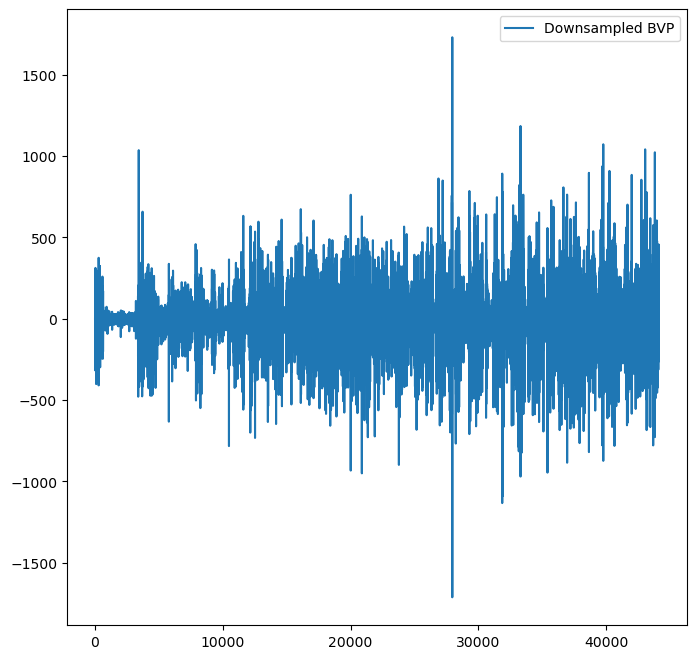

In [46]:
#downsample bvp to match eda

window = 16
downsampled_bvp = bvp_value.groupby((bvp_value.index/window).astype('i')).mean()

print(type(downsampled_bvp))

plt.figure(figsize=(8, 8))
plt.plot(downsampled_bvp, label='Downsampled BVP')
plt.legend()

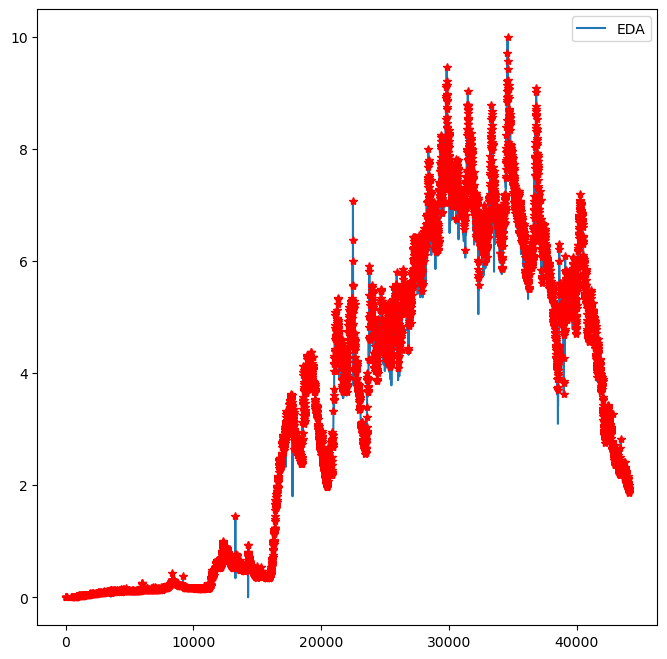

In [43]:
#marking the peaks eda

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.plot(eda_value['EDA'][peaks_eda], 'r*') # 'r*' will plot stars of red color.
plt.legend()

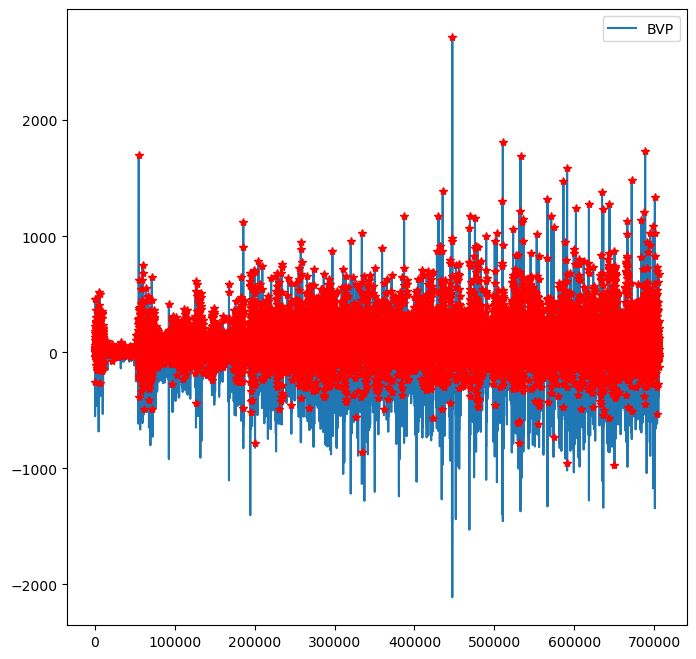

In [49]:
#marking the peaks bvp

plt.figure(figsize=(8, 8))
plt.plot(bvp_value, label='BVP')
plt.plot(bvp_value['BVP'][peaks_bvp], 'r*') # 'r*' will plot stars of red color.
plt.legend()

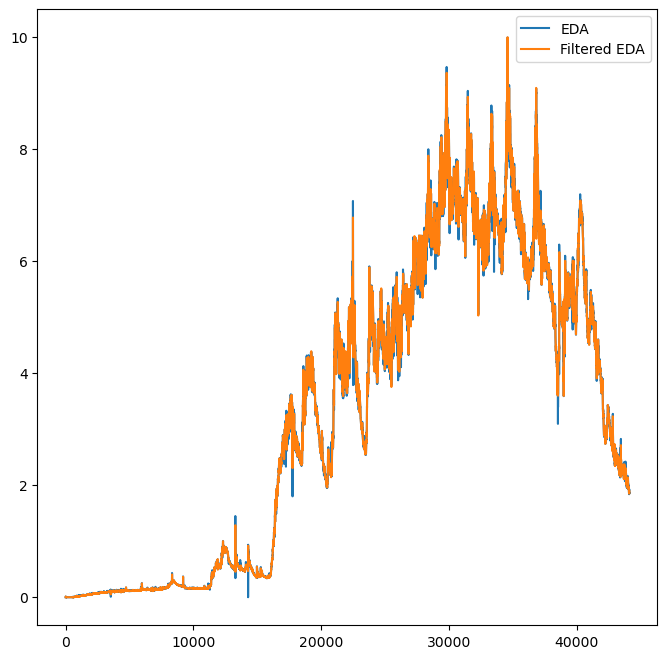

In [30]:
#filtering eda

order = 5 #order of the filter, expressed as integer
f_cut_off = 0.5 #Hz, cut-off frequency
f_sampling = 4 #Hz, sampling frequency

b, a = butter(order, f_cut_off, fs = f_sampling)

filtered_eda = filtfilt(b,a,eda_value, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.plot(filtered_eda, label='Filtered EDA')
plt.legend()

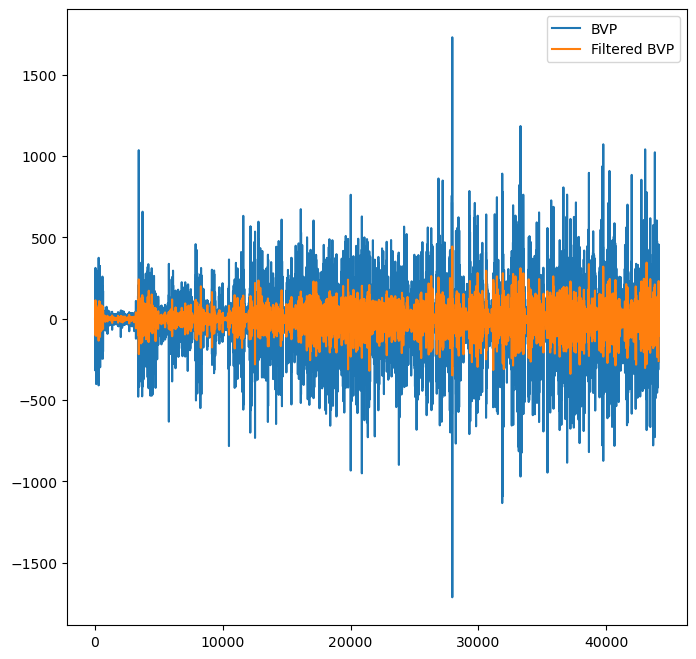

In [31]:
#filtering bvp


order = 5 #order of the filter, expressed as integer
f_cut_off = 0.5 #Hz, cut-off frequency
f_sampling = 4 #Hz, sampling frequency

b, a = butter(order, f_cut_off, fs = f_sampling)

filtered_bvp = filtfilt(b,a,downsampled_bvp, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(downsampled_bvp, label='BVP')
plt.plot(filtered_bvp, label='Filtered BVP')
plt.legend()

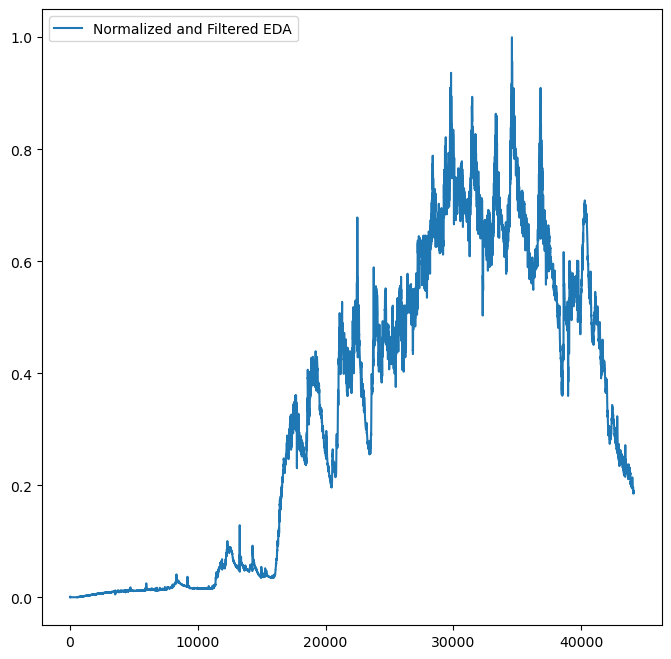

In [32]:
#normalization of eda 0-1

normalized_eda = (filtered_eda-min(filtered_eda))/(max(filtered_eda)-min(filtered_eda))
plt.figure(figsize=(8, 8))
plt.plot(normalized_eda, label='Normalized and Filtered EDA')
plt.legend()

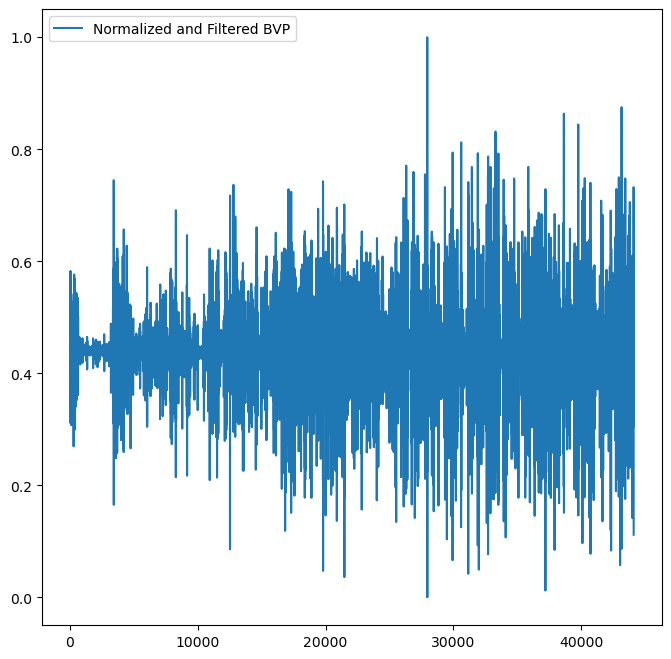

In [35]:
#normalization of bvp 0-1

normalized_bvp = (filtered_bvp-min(filtered_bvp))/(max(filtered_bvp)-min(filtered_bvp))
plt.figure(figsize=(8, 8))
plt.plot(normalized_bvp, label='Normalized and Filtered BVP')
plt.legend()

In [36]:
#reverting numpy arrays back to df and concat

denormalized_bvp = normalized_bvp * (max(filtered_bvp) - min(filtered_bvp)) + min(filtered_bvp)
denormalized_eda = normalized_eda * (max(filtered_eda) - min(filtered_eda)) + min(filtered_eda)

eda_result = pd.DataFrame(denormalized_eda, columns = ['EDA'])
bvp_result = pd.DataFrame(denormalized_bvp, columns = ['BVP'])

df_result = pd.concat([eda_result, bvp_result], axis = 1)

df_result

,EDA,BVP
0,4.965260e-07,-0.238749
1,5.471102e-03,15.681772
2,9.882620e-03,19.722110
3,1.258570e-02,7.526142
4,1.353432e-02,-14.842878
...,...,...
44110,1.865071e+00,209.614270
44111,1.858134e+00,231.389501
44112,NaN,152.958538
44113,NaN,-23.494988


In [38]:
#export df_result to folder with timestamp
parent_folder = 'C:/Users/anilp/Project_Files'

current_datetime = datetime.datetime.now()
timestamp = current_datetime.strftime('%d-%m-%Y %Hh%Mm%Ss')

new_folder = os.path.join(parent_folder, timestamp)
os.makedirs(new_folder, exist_ok=True) 
csv_file_path = os.path.join(new_folder, 'df_result.csv')

df_result.to_csv(csv_file_path, index=False)
print(f"Data exported to {csv_file_path}")

Data exported to C:/Users/anilp/Project_Files\10-11-2023 23h06m48s\df_result.csv
